In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from concurrent.futures import ThreadPoolExecutor

In [12]:
img_size = 128
dataset_size_train = 10000
dataset_size_test_similar = 1000
dataset_size_test_dissimilar = 1000
max_interval = 16

dataset_path = "./dataset"

In [13]:
linspace_x = np.linspace(0, img_size-1, img_size)
linspace_y = np.linspace(0, img_size-1, img_size)
grid_x, grid_y = np.meshgrid(linspace_x, linspace_y, indexing='xy')

In [14]:
# Create a training set with positional bias
dataset_train_class_A = np.zeros((dataset_size_train // 2, img_size, img_size), dtype=np.float32)
dataset_train_class_B = np.zeros((dataset_size_train // 2, img_size, img_size), dtype=np.float32)

intervals_train_class_A = np.random.randint(2, max_interval, size=(dataset_size_train // 2))
intervals_train_class_B = np.random.randint(2, max_interval, size=(dataset_size_train // 2))

offsets_train_class_A = np.random.randint(0, intervals_train_class_A, size=(dataset_size_train // 2))
offsets_train_class_B = np.random.randint(0, intervals_train_class_B, size=(dataset_size_train // 2))

# for each image set every pixel's value to sin(x)sin(y) based on the respective pixel coordinates
dataset_train_class_A = (np.sin((grid_y[None,...] + offsets_train_class_A[:,None,None]) * np.pi / intervals_train_class_A[:, None, None]) / 2 + 0.5)
dataset_train_class_B = (np.sin((grid_x[None,...] + offsets_train_class_B[:,None,None]) * np.pi / intervals_train_class_B[:, None, None]) / 2 + 0.5)

dataset_train_class_A[:,:16,:16] = 1.0
dataset_train_class_B[:,-16:,-16:] = 1.0

In [15]:
# Create the similar test set
dataset_test_similar_class_A = np.zeros((dataset_size_test_similar // 2, img_size, img_size), dtype=np.float32)
dataset_test_similar_class_B = np.zeros((dataset_size_test_similar // 2, img_size, img_size), dtype=np.float32)

intervals_test_similar_class_A = np.random.randint(2, max_interval, size=(dataset_size_test_similar // 2))
intervals_test_similar_class_B = np.random.randint(2, max_interval, size=(dataset_size_test_similar // 2))

offsets_test_similar_class_A = np.random.randint(0, intervals_test_similar_class_A, size=(dataset_size_test_similar // 2))
offsets_test_similar_class_B = np.random.randint(0, intervals_test_similar_class_B, size=(dataset_size_test_similar // 2))

# for each image set every pixel's value to sin(x)sin(y) based on the respective pixel coordinates
dataset_test_similar_class_A = (np.sin((grid_y[None,...] + offsets_test_similar_class_A[:,None,None]) * np.pi / intervals_test_similar_class_A[:, None, None]) / 2 + 0.5)
dataset_test_similar_class_B = (np.sin((grid_x[None,...] + offsets_test_similar_class_B[:,None,None]) * np.pi / intervals_test_similar_class_B[:, None, None]) / 2 + 0.5)

dataset_test_similar_class_A[:,:16,:16] = 1.0
dataset_test_similar_class_B[:,-16:,-16:] = 1.0

In [16]:
# Create the dissimilar test set
dataset_test_dissimilar_class_A = np.zeros((dataset_size_test_dissimilar // 2, img_size, img_size), dtype=np.float32)
dataset_test_dissimilar_class_B = np.zeros((dataset_size_test_dissimilar // 2, img_size, img_size), dtype=np.float32)

intervals_test_dissimilar_class_A = np.random.randint(2, max_interval, size=(dataset_size_test_dissimilar // 2))
intervals_test_dissimilar_class_B = np.random.randint(2, max_interval, size=(dataset_size_test_dissimilar // 2))

offsets_test_dissimilar_class_A = np.random.randint(0, intervals_test_dissimilar_class_A, size=(dataset_size_test_dissimilar // 2))
offsets_test_dissimilar_class_B = np.random.randint(0, intervals_test_dissimilar_class_B, size=(dataset_size_test_dissimilar // 2))

# for each image set every pixel's value to sin(x)sin(y) based on the respective pixel coordinates
dataset_test_dissimilar_class_A = (np.sin((grid_y[None,...] + offsets_test_dissimilar_class_A[:,None,None]) * np.pi / intervals_test_dissimilar_class_A[:, None, None]) / 2 + 0.5)
dataset_test_dissimilar_class_B = (np.sin((grid_x[None,...] + offsets_test_dissimilar_class_B[:,None,None]) * np.pi / intervals_test_dissimilar_class_B[:, None, None]) / 2 + 0.5)

dataset_test_dissimilar_class_A[:,-16:,-16:] = 1.0
dataset_test_dissimilar_class_B[:,:16,:16] = 1.0

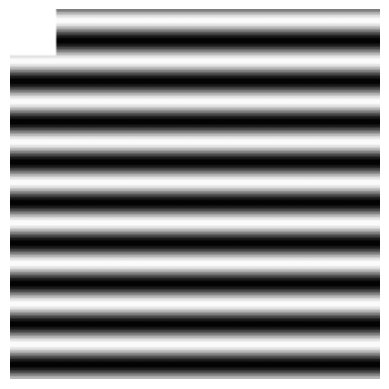

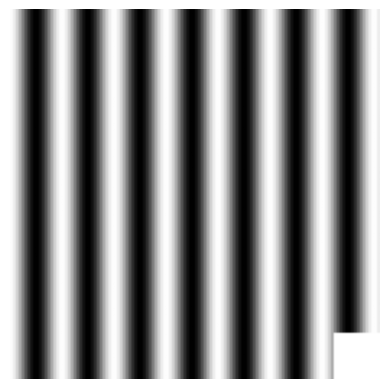

In [17]:
# visualize first image
img_A = Image.fromarray((dataset_train_class_A[17]*255).astype(np.uint8), mode='L')
img_B = Image.fromarray((dataset_train_class_B[0]*255).astype(np.uint8), mode='L')

plt.imshow(img_A, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

plt.imshow(img_B, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [18]:
images_train_class_A = [Image.fromarray((dataset_train_class_A[i]*255).astype(np.uint8), mode='L') for i in range(dataset_size_train // 2)]
images_train_class_B = [Image.fromarray((dataset_train_class_B[i]*255).astype(np.uint8), mode='L') for i in range(dataset_size_train // 2)]

images_test_similar_class_A = [Image.fromarray((dataset_test_similar_class_A[i]*255).astype(np.uint8), mode='L') for i in range(dataset_size_test_similar // 2)]
images_test_similar_class_B = [Image.fromarray((dataset_test_similar_class_B[i]*255).astype(np.uint8), mode='L') for i in range(dataset_size_test_similar // 2)]

images_test_dissimilar_class_A = [Image.fromarray((dataset_test_dissimilar_class_A[i]*255).astype(np.uint8), mode='L') for i in range(dataset_size_test_dissimilar // 2)]
images_test_dissimilar_class_B = [Image.fromarray((dataset_test_dissimilar_class_B[i]*255).astype(np.uint8), mode='L') for i in range(dataset_size_test_dissimilar // 2)]

In [19]:
os.makedirs(dataset_path + "/train", exist_ok=True)
os.makedirs(dataset_path + "/test/similar", exist_ok=True)
os.makedirs(dataset_path + "/test/dissimilar", exist_ok=True)

filenames_train_class_A = [dataset_path + "/train/class_A_" + str(i) + ".png" for i in range(dataset_size_train // 2)]
filenames_train_class_B = [dataset_path + "/train/class_B_" + str(i) + ".png" for i in range(dataset_size_train // 2)]

filenames_test_similar_class_A = [dataset_path + "/test/similar/class_A_" + str(i) + ".png" for i in range(dataset_size_test_similar // 2)]
filenames_test_similar_class_B = [dataset_path + "/test/similar/class_B_" + str(i) + ".png" for i in range(dataset_size_test_similar // 2)]

filenames_test_dissimilar_class_A = [dataset_path + "/test/dissimilar/class_A_" + str(i) + ".png" for i in range(dataset_size_test_dissimilar // 2)]
filenames_test_dissimilar_class_B = [dataset_path + "/test/dissimilar/class_B_" + str(i) + ".png" for i in range(dataset_size_test_dissimilar // 2)]

In [20]:
def save_image(image, filename):
    image.save(filename)

with ThreadPoolExecutor(max_workers=10) as executor:
    executor.map(save_image, images_train_class_A, filenames_train_class_A)
    executor.map(save_image, images_train_class_B, filenames_train_class_B)
    executor.map(save_image, images_test_similar_class_A, filenames_test_similar_class_A)
    executor.map(save_image, images_test_similar_class_B, filenames_test_similar_class_B)
    executor.map(save_image, images_test_dissimilar_class_A, filenames_test_dissimilar_class_A)
    executor.map(save_image, images_test_dissimilar_class_B, filenames_test_dissimilar_class_B)